<a href="https://colab.research.google.com/github/Simranjeet-Singh-1313/Spam_Classifier/blob/main/Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [420]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download("stopwords")
from sklearn.feature_extraction.text import CountVectorizer
import re
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## preprocessing


In [421]:
# dataset read
messages = pd.read_csv('SMSSpamCollection', sep='\t',
                           names=["label", "message"])

In [422]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [423]:
# count number of true and false values
pd.DataFrame(messages['label'].value_counts())

,label
ham,4825
spam,747


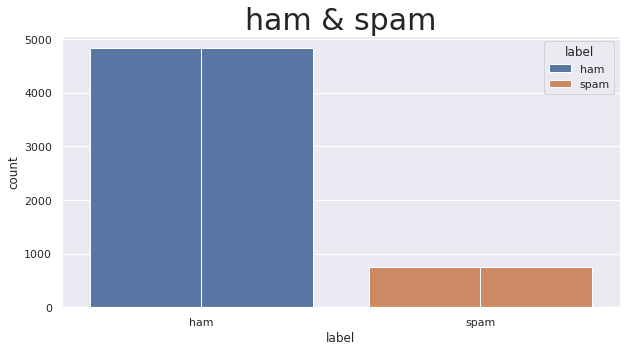

In [424]:
# plot ham & spam in messages
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="label", data=messages)
# plt.xlabel('ham & spam', fontsize = 15)
plt.title('ham & spam', fontsize = 30)
ax = sns.countplot(x="label",hue='label', data=messages)

In [425]:
wordnet=WordNetLemmatizer()
stop = stopwords.words('english')

In [426]:
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in stop]
    review = ' '.join(review)
    corpus.append(review)

In [427]:
messages["message"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [428]:
corpus[0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [429]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=3000)
X = cv.fit_transform(corpus).toarray()

In [430]:
y=pd.get_dummies(messages['label'])
y=y.iloc[:,1].values

In [431]:
# from imblearn.over_sampling as SMOTE
smote = SMOTE(sampling_strategy='minority');
x_smote, y_smote = smote.fit_sample(X,y);

print("Shape of x_smote :", x_smote.shape)
print("Shape of y_smote :", y_smote.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Shape of x_smote : (9650, 3000)
Shape of y_smote : (9650,)


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  results = ax.pie(y, labels=blabels, **kwds)


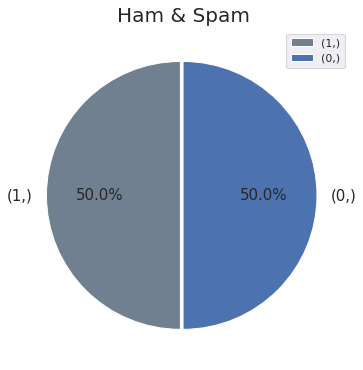

In [432]:
# Plotting a pie chart for label after balancing the dataset
list_label=pd.DataFrame(y_smote)
plt.figure(figsize=(6,7))
list_label.value_counts().plot(kind='pie',autopct='%1.1f%%',textprops={'fontsize': 15},startangle=90,explode =(0.02,0),colors=['slategray','B'])
plt.title('Ham & Spam', fontsize = 20)
plt.ylabel('')
plt.legend()

In [433]:
# count number of Hams and Spams values
count_label=pd.DataFrame(list_label.value_counts())
count_label.rename(columns = {0:"Label"},index={1:"Ham",0:"Spam"}, inplace = True)
count_label

,Label
0,
Ham,4825
Spam,4825


In [434]:
# split dataset into two parts (train and test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.30,stratify=y_smote)

## Model implementation

In [435]:
#define Confusion matrix function
def ConfusionMatrix(A,B):
  CM=confusion_matrix(A, B)
  fig, ax = plot_confusion_matrix(CM,show_absolute=True,show_normed=True,colorbar=True)
  plt.show()

### Multinomianl Naive Bayes

Training Accuracy : 0.9748334566987417
Testing Accuracy : 0.9727115716753022
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1448
           1       0.97      0.97      0.97      1447

    accuracy                           0.97      2895
   macro avg       0.97      0.97      0.97      2895
weighted avg       0.97      0.97      0.97      2895



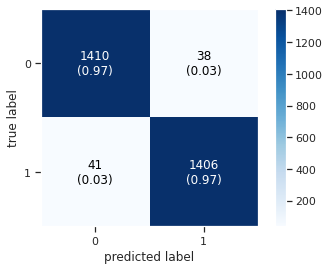

In [436]:
# define Multinomianl Naive bayes classifier
spam_detect_model = MultinomialNB().fit(X_train, y_train)
y_predict=spam_detect_model.predict(X_test)

# evaluating the model
print("Training Accuracy :", spam_detect_model.score(X_train, y_train))
print("Testing Accuracy :", spam_detect_model.score(X_test, y_test))

# eveluate confusion matrix
print(classification_report(y_test,y_predict))


# confusion matrix
ConfusionMatrix(y_test,y_predict)

### SVM

Training Accuracy : 0.9766099185788305
Testing Accuracy : 0.9450777202072539
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1448
           1       0.93      0.97      0.95      1447

    accuracy                           0.95      2895
   macro avg       0.95      0.95      0.95      2895
weighted avg       0.95      0.95      0.95      2895



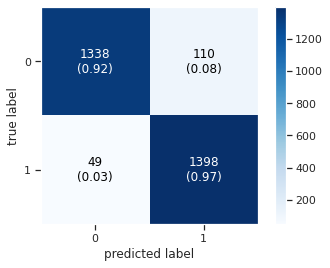

In [437]:
# define svm classifier
model=svm.SVC()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

# evaluating the model
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

# eveluate confusion matrix
print(classification_report(y_test,y_predict))

# confusion matrix
ConfusionMatrix(y_test,y_predict)